In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import time
import lightgbm as lgb

In [2]:
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [3]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [4]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [5]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [6]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [7]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


## 資料前處理

In [8]:
print('----------head---------')
print(sales_train.head(5))
print('------information------')
print(sales_train.info())
print('-----missing value-----')
print(sales_train.isnull().sum())
print('--------nan value------')
print(sales_train.isna().sum())

----------head---------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
------information------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----missing value-----
date              0
date_block_num    0
shop_id           0
item_id    

In [9]:
sales_by_item_id = sales_train.pivot_table(index=['item_id'], values=['item_cnt_day'], 
                                           columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'
sales_by_item_id

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21802,22165,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21803,22166,0,0,0,0,0,0,0,0,0,...,7,8,12,4,8,10,8,11,5,11
21804,22167,0,0,0,0,0,0,0,0,56,...,33,46,40,38,31,33,34,29,21,37
21805,22168,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 近 12 個月沒有銷量的 item
outdated_items = sales_by_item_id[sales_by_item_id.loc[:, '21':].sum(axis=1) == 0]
print('Outdated items:', len(outdated_items))

Outdated items: 9204


In [11]:
# test 資料集共有 5100 項 item，其中有 84 項 item 近 12 個月銷量為 0
print('unique items in test set:', test['item_id'].nunique())
print('Outdated items in test set:', test[test['item_id'].isin(outdated_items['item_id'])]['item_id'].nunique())

unique items in test set: 5100
Outdated items in test set: 84


In [12]:
# 合併訓練集中每個 item id 對應的 category
categories = items[['item_id','item_category_id']]
sales_train_merge_cat = pd.merge(sales_train, categories, on = 'item_id', how = 'left')
sales_train_merge_cat

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,55
2935845,09.10.2015,33,25,7460,299.00,1.0,55
2935846,14.10.2015,33,25,7459,349.00,1.0,55
2935847,22.10.2015,33,25,7440,299.00,1.0,57


Sale volume outliers: [2169.]
Sale price outliers: [307980.]


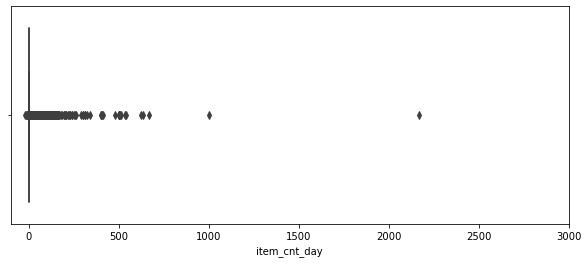

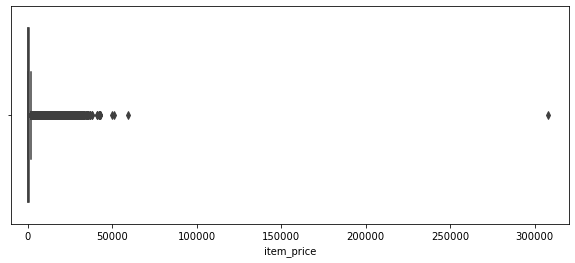

In [13]:
# 畫出離群值
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x = sales_train['item_cnt_day'])
print('Sale volume outliers:',sales_train['item_cnt_day'][sales_train['item_cnt_day']>1001].unique())
plt.figure(figsize=(10,4))
plt.xlim(-10000,320000)
sns.boxplot(x = sales_train['item_price'])
print('Sale price outliers:',sales_train['item_price'][sales_train['item_price']>300000].unique())

<AxesSubplot:xlabel='item_price'>

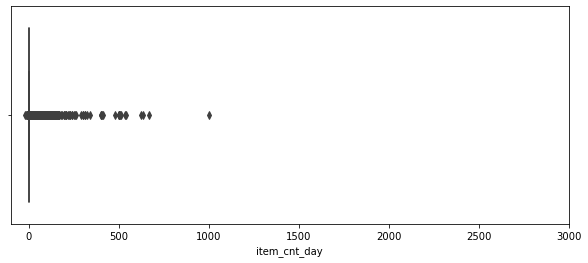

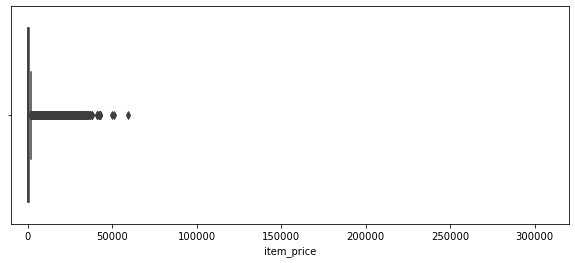

In [14]:
sales_train = sales_train[sales_train['item_cnt_day'] < 1001]
sales_train = sales_train[sales_train['item_price'] < 300000]
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x = sales_train['item_cnt_day'])

plt.figure(figsize=(10,4))
plt.xlim(-10000,320000)
sns.boxplot(x = sales_train['item_price'])

In [15]:
# 將 item_price < 0 的資料用 median price取代 
# (相同 date_block_num、shop_id、item_id)
sales_train[sales_train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [16]:
median = sales_train[(sales_train['date_block_num'] == 4) & (sales_train['shop_id'] == 32)\
                     & (sales_train['item_id'] == 2973) & (sales_train['item_price']>0)].item_price.median()
sales_train.loc[sales_train['item_price']<0,'item_price'] = median
print(median)

1874.0


## test 資料集

In [17]:
good_sales = test.merge(sales_train, on=['item_id','shop_id'], how='left').dropna()
good_pairs = test[test['ID'].isin(good_sales['ID'])]
no_data_items = test[~(test['item_id'].isin(sales_train['item_id']))]    # 訓練集有出現過、但測試集沒有出現過的 item
print('1. Number of good pairs:', len(good_pairs))
print('2. No Data Items:', len(no_data_items))
print('3. Only Item_id Info:', len(test)-len(no_data_items)-len(good_pairs))

1. Number of good pairs: 111404
2. No Data Items: 15246
3. Only Item_id Info: 87550


In [18]:
test['ID'].isin(good_sales['ID'])

0          True
1         False
2          True
3          True
4         False
          ...  
214195     True
214196    False
214197     True
214198    False
214199     True
Name: ID, Length: 214200, dtype: bool

In [19]:
sales_train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [20]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [21]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [22]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


### 商店編碼

In [23]:
shops['shop_name'] = shops['shop_name'].apply(lambda x: x.lower()).str.replace('[^\w\s]', '').str.replace('\d+','').str.strip()
shops['shop_city'] = shops['shop_name'].str.partition(' ')[0]
shops['shop_type'] = shops['shop_name'].apply(lambda x: 'мтрц' if 'мтрц' in x else 'трц' if 'трц' in x else 'трк' if 'трк' in x else 'тц' if 'тц' in x else 'тк' if 'тк' in x else 'NO_DATA')
shops

,shop_name,shop_id,shop_city,shop_type
0,якутск орджоникидзе фран,0,якутск,NO_DATA
1,якутск тц центральный фран,1,якутск,тц
2,адыгея тц мега,2,адыгея,тц
3,балашиха трк октябрькиномир,3,балашиха,трк
4,волжский тц волга молл,4,волжский,тц
5,вологда трц мармелад,5,вологда,трц
6,воронеж плехановская,6,воронеж,NO_DATA
7,воронеж трц максимир,7,воронеж,трц
8,воронеж трц ситипарк град,8,воронеж,трц
9,выездная торговля,9,выездная,NO_DATA


In [24]:
shops['shop_city_code'] = LabelEncoder().fit_transform(shops['shop_city'])
shops['shop_type_code'] = LabelEncoder().fit_transform(shops['shop_type'])
shops

,shop_name,shop_id,shop_city,shop_type,shop_city_code,shop_type_code
0,якутск орджоникидзе фран,0,якутск,NO_DATA,29,0
1,якутск тц центральный фран,1,якутск,тц,29,5
2,адыгея тц мега,2,адыгея,тц,0,5
3,балашиха трк октябрькиномир,3,балашиха,трк,1,3
4,волжский тц волга молл,4,волжский,тц,2,5
5,вологда трц мармелад,5,вологда,трц,3,4
6,воронеж плехановская,6,воронеж,NO_DATA,4,0
7,воронеж трц максимир,7,воронеж,трц,4,4
8,воронеж трц ситипарк град,8,воронеж,трц,4,4
9,выездная торговля,9,выездная,NO_DATA,5,0


In [25]:
lines1 = [26,27,28,29,30,31]
lines2 = [81,82]
for index in lines1:
    category_name = item_categories.loc[index,'item_category_name']
#     print(category_name)
    category_name = category_name.replace('Игры','Игры -')
#     print(category_name)
    categories.loc[index,'item_category_name'] = category_name

for index in lines2:
    category_name = item_categories.loc[index,'item_category_name']
#    print(category_name)
    category_name = category_name.replace('Чистые','Чистые -')
#    print(category_name)
    categories.loc[index,'item_category_name'] = category_name

category_name = item_categories.loc[32,'item_category_name']
#print(category_name)
category_name = category_name.replace('Карты оплаты','Карты оплаты -')
#print(category_name)
item_categories.loc[32,'item_category_name'] = category_name

In [26]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [27]:
item_categories['split'] = item_categories['item_category_name'].str.split('-')
item_categories['type'] = item_categories['split'].map(lambda x:x[0].strip())
item_categories['subtype'] = item_categories['split'].map(lambda x:x[1].strip() if len(x) > 1 else x[0].strip())
item_categories = item_categories[['item_category_id','type','subtype']]
item_categories.head()

,item_category_id,type,subtype
0,0,PC,Гарнитуры/Наушники
1,1,Аксессуары,PS2
2,2,Аксессуары,PS3
3,3,Аксессуары,PS4
4,4,Аксессуары,PSP


In [28]:
items = items.drop(columns = ['item_name'])
items

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
...,...,...
22165,22165,31
22166,22166,54
22167,22167,49
22168,22168,62


In [29]:
items = items.merge(item_categories, how='left', on='item_category_id')

In [30]:
items

,item_id,item_category_id,type,subtype
0,0,40,Кино,DVD
1,1,76,Программы,Для дома и офиса (Цифра)
2,2,40,Кино,DVD
3,3,40,Кино,DVD
4,4,40,Кино,DVD
...,...,...,...,...
22165,22165,31,Игры PC,Цифра
22166,22166,54,Книги,Цифра
22167,22167,49,Книги,Методические материалы 1С
22168,22168,62,Подарки,"Гаджеты, роботы, спорт"


In [31]:
labelencoder = LabelEncoder()
items['type'] = labelencoder.fit_transform(items['type'])
items['subtype'] = labelencoder.fit_transform(items['subtype'])
items = items.drop(columns=['item_category_id'])
items

,item_id,type,subtype
0,0,10,5
1,1,14,32
2,2,10,5
3,3,10,5
4,4,10,5
...,...,...,...
22165,22165,8,61
22166,22166,11,61
22167,22167,11,39
22168,22168,13,29


In [32]:
items

,item_id,type,subtype
0,0,10,5
1,1,14,32
2,2,10,5
3,3,10,5
4,4,10,5
...,...,...,...
22165,22165,8,61
22166,22166,11,61
22167,22167,11,39
22168,22168,13,29


In [33]:
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [34]:
# sales_train_subset = sales_train[sales_train['date_block_num'] == 0]
train = sales_train[['date_block_num', 'item_price', 'shop_id','item_id','item_cnt_day']].groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day':'sum'}).reset_index()
train = train.rename(columns={'item_cnt_day' : 'item_cnt_month'})
# for i in range(34):
#     sales_train_subset = sales_train[sales_train['date_block_num'] == i]
#     grouped = sales_train_subset[['shop_id','item_id','item_cnt_day']].groupby(['shop_id','item_id']).agg({'item_cnt_day':'sum'}).reset_index()
#     grouped = grouped.rename(columns={'item_cnt_day' : 'item_cnt_month'})

In [35]:
train = train.merge(shops[['shop_id', 'shop_city_code', 'shop_type_code']], how='left', on=['shop_id'])

In [36]:
train

,date_block_num,shop_id,item_id,item_cnt_month,shop_city_code,shop_type_code
0,0,0,32,6.0,29,0
1,0,0,33,3.0,29,0
2,0,0,35,1.0,29,0
3,0,0,43,1.0,29,0
4,0,0,51,2.0,29,0
...,...,...,...,...,...,...
1609118,33,59,22087,6.0,30,5
1609119,33,59,22088,2.0,30,5
1609120,33,59,22091,1.0,30,5
1609121,33,59,22100,1.0,30,5


In [37]:
train = train.merge(items,how='left',on='item_id')

In [38]:
train

,date_block_num,shop_id,item_id,item_cnt_month,shop_city_code,shop_type_code,type,subtype
0,0,0,32,6.0,29,0,10,5
1,0,0,33,3.0,29,0,10,2
2,0,0,35,1.0,29,0,10,5
3,0,0,43,1.0,29,0,10,5
4,0,0,51,2.0,29,0,12,9
...,...,...,...,...,...,...,...,...
1609118,33,59,22087,6.0,30,5,18,64
1609119,33,59,22088,2.0,30,5,18,64
1609120,33,59,22091,1.0,30,5,18,64
1609121,33,59,22100,1.0,30,5,11,20


In [39]:
X_train = train[['shop_city_code', 'shop_type_code','type','subtype']]

In [40]:
X_train

,shop_city_code,shop_type_code,type,subtype
0,29,0,10,5
1,29,0,10,2
2,29,0,10,5
3,29,0,10,5
4,29,0,12,9
...,...,...,...,...
1609118,30,5,18,64
1609119,30,5,18,64
1609120,30,5,18,64
1609121,30,5,11,20


In [41]:
Y_train = train['item_cnt_month']

In [42]:
Y_train

0          6.0
1          3.0
2          1.0
3          1.0
4          2.0
          ... 
1609118    6.0
1609119    2.0
1609120    1.0
1609121    1.0
1609122    1.0
Name: item_cnt_month, Length: 1609123, dtype: float64

In [43]:
test = test.merge(shops[['shop_id', 'shop_city_code', 'shop_type_code']], how='left', on=['shop_id'])

In [44]:
test = test.merge(items,how='left',on='item_id')

In [45]:
test

,ID,shop_id,item_id,shop_city_code,shop_type_code,type,subtype
0,0,5,5037,3,4,5,11
1,1,5,5320,3,4,12,3
2,2,5,5233,3,4,5,11
3,3,5,5232,3,4,5,17
4,4,5,5268,3,4,5,12
...,...,...,...,...,...,...,...
214195,214195,45,18454,19,5,12,3
214196,214196,45,16188,19,5,13,42
214197,214197,45,15757,19,5,12,3
214198,214198,45,19648,19,5,10,5


In [46]:
X_test = test[['shop_city_code', 'shop_type_code','type','subtype']]

In [47]:
X_test

,shop_city_code,shop_type_code,type,subtype
0,3,4,5,11
1,3,4,12,3
2,3,4,5,11
3,3,4,5,17
4,3,4,5,12
...,...,...,...,...
214195,19,5,12,3
214196,19,5,13,42
214197,19,5,12,3
214198,19,5,10,5


In [48]:
X_valid = train[train.date_block_num == 33].drop(['item_cnt_month'], axis=1)
X_valid = X_valid[['shop_city_code', 'shop_type_code','type','subtype']]
Y_valid = train[train.date_block_num == 33]['item_cnt_month']

In [49]:
Y_valid

1577592    1.0
1577593    3.0
1577594    1.0
1577595    1.0
1577596    1.0
          ... 
1609118    6.0
1609119    2.0
1609120    1.0
1609121    1.0
1609122    1.0
Name: item_cnt_month, Length: 31531, dtype: float64

lightGBM
#調參數過程

In [50]:
# # 筆電跑起來太久就先不跑
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import RandomizedSearchCV
# estimator=LGBMRegressor()
# parameter_grid={
#         'max_depth':range(2,5,1),
#         'learning_rate':np.linspace(0.001,1,20ㄇ),
#         'feature_fraction':np.linspace(0.5,0.99,20),
#         'bagging_fraction':np.linspace(0.1,0.99,20),
#         'bagging_frequency':range(5,10,1),
#         'num_leaves':range(100,200,5),
#         'min_data_in_leaf':range(50,200,10),
#         'n_estimators':range(100,5000,100)}
# grid = RandomizedSearchCV(estimator,parameter_grid,cv = 3,scoring = 'neg_root_mean_squared_error',n_iter=500,n_jobs = -1)
# grid.fit(X_train, Y_train)
# # print best parameter combination
# print (grid.best_params_)

lightGBM

In [51]:
from math import *
import math
import sklearn.metrics as sklm
from lightgbm import LGBMRegressor
estimator=LGBMRegressor()
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=5,
                         min_data_in_leaf= 20,
                         min_sum_hessian_in_leaf = 11,
                         reg_alpha =0.5,
                         reg_lambda =1,
                         learning_rate=0.05,
                         n_estimators=1000,
                         max_bin=55, 
                         metric="rmse",
                         max_depth =3,
                         bagging_fraction=0.8,
                         bagging_freq=5,
                         bagging_seed=9,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)
lgbm_fit = lightgbm.fit(X_train, Y_train)
y_lgbm_train=lgbm_fit.predict(X_train)
y_lgbm_test=lgbm_fit.predict(X_test)
# print('RMSE_train_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(Y_train, y_lgbm_train))))
# print('RMSE_test_LGBM = ' + str(math.sqrt(sklm.mean_squared_error(Y_test, y_lgbm_test))))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [52]:
len(y_lgbm_test)

214200

In [53]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = y_lgbm_test
df_output[['ID', 'item_cnt_month']].to_csv('lightGBM.csv', index=False)

Ridge Regression

In [54]:
from sklearn.linear_model import RidgeCV
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Ridge = RidgeCV(cv=5, alphas=alpha,normalize=True)
Ridge_fit=Ridge.fit(X_train,Y_train)
y_ridge_train=Ridge_fit.predict(X_train)
y_ridge_test=Ridge_fit.predict(X_test)


In [55]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = y_ridge_test
df_output[['ID', 'item_cnt_month']].to_csv('Ridge Regression.csv', index=False)

Lasso Regression

In [56]:
from sklearn.linear_model import LassoCV
# set cross-validation alpha
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
# find the best alpha and build model
Lasso = LassoCV(cv=5, alphas=alpha,normalize=True)
Lasso_fit=Lasso.fit(X_train,Y_train)
y_lasso_train=Lasso_fit.predict(X_train)
y_lasso_test=Lasso_fit.predict(X_test)
## validation( train data and validate data)
# print('RMSE_train_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
# print('RMSE_test_Lasso = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

In [57]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = y_lasso_test
df_output[['ID', 'item_cnt_month']].to_csv('Lasso Regression.csv', index=False)

ElasticNet Regression

In [58]:
from sklearn.linear_model import ElasticNetCV
# set cross-validation alpha and l1ratio
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]
# find the best alpha/l1ratio and build model
elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alpha,  l1_ratio=l1ratio,normalize=True)
elastic_fit = elastic_cv.fit(X_train, Y_train)
y_el_train=elastic_fit.predict(X_train)
y_el_test=elastic_fit.predict(X_test)


In [59]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = y_el_test
df_output[['ID', 'item_cnt_month']].to_csv('ElasticNet Regression.csv', index=False)

xgboost

In [60]:
# # 調參過程
# # 跑太久就先不跑
# from xgboost.sklearn import XGBRegressor
# estimator=XGBRegressor()
# parameter_grid={
#         'max_depth':range(2,5,1),
#         'learning_rate':np.linspace(0.001,1,20),
#         'colsample_bytree':np.linspace(0.1,0.99,20),
#         'num_leaves':range(100,200,5),
#         'n_estimators':range(100,5000,100)}
# grid = RandomizedSearchCV(estimator,parameter_grid,cv = 5,scoring = 'neg_root_mean_squared_error',n_iter=500,n_jobs = -1)
# grid.fit(x_train, y_train)
# # print best parameter combination
# print (grid.best_params_)


In [61]:
from xgboost.sklearn import XGBRegressor
estimator=XGBRegressor()
xgb= XGBRegressor(base_score=0.5, 
                  booster='gbtree', 
                  colsample_bylevel=1,
                  colsample_bynode=1, 
                  colsample_bytree=0.7, 
                  gamma=0,
                  importance_type='gain', 
                  learning_rate=0.01,
                  max_delta_step=0,
                  max_depth=3, 
                  min_child_weight=0, 
                  missing=None, 
                  n_estimators=1000,
                  n_jobs=1, 
                  nthread=None, 
                  objective='reg:squarederror', 
                  random_state=0,
                  reg_alpha=1, 
                  reg_lambda=1, 
                  scale_pos_weight=1, 
                  seed=None,
                  silent=None, 
                  subsample=1, 
                  verbosity=1)
xgb_fit = xgb.fit(X_train, Y_train)
y_xgb_train=xgb_fit.predict(X_train)
y_xgb_test=xgb_fit.predict(X_test)

In [62]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = y_xgb_test
df_output[['ID', 'item_cnt_month']].to_csv('XGboost.csv', index=False)

Voting

In [63]:
from sklearn.ensemble import VotingRegressor
# Build Model
vote_mod = VotingRegressor([('Ridge', Ridge_fit), ('Lasso', Lasso_fit), ('Elastic', elastic_fit),
                            ('lgbm', lgbm_fit),('xgb',xgb_fit)])
vote= vote_mod.fit(X_train, Y_train.ravel())
# predict train/test y
vote_pred_train=vote.predict(X_train)
vote_pred_test=vote.predict(X_test)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [64]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = vote_pred_test
df_output[['ID', 'item_cnt_month']].to_csv('Voting.csv', index=False)

Stacking

In [65]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Build Model
gbdt=GradientBoostingRegressor(learning_rate=0.05,
                               max_leaf_nodes=3,
                              n_estimators=100)
stregr = StackingRegressor(regressors=[Ridge_fit, Lasso_fit, elastic_fit, lgbm_fit,xgb_fit], 
                           meta_regressor=gbdt, 
                           use_features_in_secondary=True)
stack_mod=stregr.fit(X_train, Y_train.ravel())
# predict train/test y
stacking_pred_train=stack_mod.predict(X_train)
stacking_pred_test=stack_mod.predict(X_test)


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [66]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = stacking_pred_test
df_output[['ID', 'item_cnt_month']].to_csv('Stacking.csv', index=False)

Blending

In [67]:
# predict and blending
# weight 隨便給，因為沒有Y_true的label，所以無法算去評估最好的weight
final_pred_voting=vote.predict(X_test)
final_pred_stacking=stack_mod.predict(X_test)
final_pred_blending=0.94*final_pred_voting+0.06*final_pred_stacking

In [68]:
df_output = pd.DataFrame()
aux = pd.read_csv('sample_submission.csv')
df_output['ID'] = aux['ID']
df_output['item_cnt_month'] = final_pred_blending
df_output[['ID', 'item_cnt_month']].to_csv('Blending.csv', index=False)